# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload both the PDF and the ipynb file on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import time
start_time = time.time() #to measure execution time

import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
import keras
from scipy import signal

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [2]:
def create_padding(input_image, d):

    n, m = input_image.shape
    output_image = np.zeros((n + 2 * d, m + 2 * d), dtype=input_image.dtype)
    output_image[d:d + n, d:d + m] = input_image
    return output_image
    

In [3]:
# validating create_padding method

input_image = np.array([[2, 3], [4, 5]])
padded_image = create_padding(input_image, 1)
print(padded_image)

[[0 0 0 0]
 [0 2 3 0]
 [0 4 5 0]
 [0 0 0 0]]


**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [4]:
def convolution(input_image, kernel):

    #TODO
    n, m = input_image.shape
    k, _ = kernel.shape

    # Output Dimensions
    output_height = n - k + 1
    output_width = m - k + 1

    # Initializing output image
    output_image = np.zeros((output_height, output_width), dtype=np.float64)

    # Convolution operation
    for i in range(output_height):
        for j in range(output_width):
            region = input_image[i:i + k, j:j + k]
            output_image[i, j] = np.sum(region * kernel)

    return output_image

In [5]:
input_image = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

kernel = np.array([[1, 0],
                   [0, -1]])

output_image = convolution(input_image, kernel)
print(output_image)


[[-4. -4.]
 [-4. -4.]]


**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [6]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    n, m = input_image.shape
    output_height = n - p + 1
    output_width = m - p + 1

    output_image = np.zeros((output_height, output_width), dtype=np.float64)

    for i in range(output_height):
        for j in range(output_width):
            window = input_image[i:i + p, j:j + p]
            if pooling_type == "max_pooling":
                output_image[i, j] = np.max(window)
            elif pooling_type == "avg_pooling":
                output_image[i, j] = np.mean(window)
            else:
                print("ERROR: Invalid pool-type")
                return None

    return output_image
    

In [7]:
input_image = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])

print("After applying Max_pooling......:\n", pooling(input_image, 2, "max_pooling"))
print("After applying Avg_pooling......:\n", pooling(input_image, 2, "avg_pooling"))

After applying Max_pooling......:
 [[5. 6.]
 [8. 9.]]
After applying Avg_pooling......:
 [[3. 4.]
 [6. 7.]]


The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

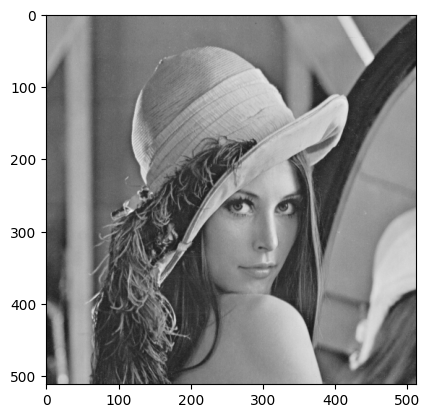

In [8]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution and pooling separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

The following outputs are expected:
1. lena kernel 1 convolution and then max pooled, set your output to the variable lena_kernel_1_maxpool.
2. lena kernel 2 convolution and then average pooled, set your output to the variable lena_kernel_2_avgpool.
3. lena kernel 3 convolution and then max pooled, set your output to the variable lena_kernel_3_maxpool.
4. lena kernel 4 convolution and then average pooled, set your output to the variable lena_kernel_4_avgpool.

In [9]:
# Define kernels
filters = [
    np.array([[+1, 0, -1], [+1, 0, -1], [+1, 0, -1]]),  # filter 1
    np.array([[-1, -1, -1], [0, 0, 0], [+1, +1, +1]]),  # filter 2
    np.array([[-1, 0, +1], [-2, 0, +2], [-1, 0, +1]]),  # filter 3
    np.array([[+1, +2, +1], [0, 0, 0], [-1, -2, -1]]),  # filter 4
    np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])     # filter 5 (sharpening)
]

def process_image_with_filter(img, fltr, pool_mode="max_pooling"):
    # Apply zero padding to maintain image size
    padded_img = create_padding(img, fltr.shape[0] // 2)
    convolved_img =convolution(padded_img, fltr)
    
    # Perform pooling on the unpadded convolved image
    pooled_img = pooling(convolved_img, 2, pooling_type=pool_mode)
    return convolved_img, pooled_img

# Load the image and convert it to grayscale
lena_gray = np.array(load_img('lena.gif').convert('L'))  # Convert to grayscale

results = []
results.append(process_image_with_filter(lena_gray, filters[0], "max_pooling"))
results.append(process_image_with_filter(lena_gray, filters[1], "avg_pooling"))
results.append(process_image_with_filter(lena_gray, filters[2], "max_pooling"))
results.append(process_image_with_filter(lena_gray, filters[3], "avg_pooling"))
results.append(process_image_with_filter(lena_gray, filters[4], "max_pooling"))

# Outputs
lena_kernel_1_maxpool = results[0][1]
lena_kernel_2_avgpool = results[1][1]
lena_kernel_3_maxpool = results[2][1]
lena_kernel_4_avgpool = results[3][1]

<font color='blue'>Explain what each of the above kernels (including your choice) will do to the image.</font>

In [10]:
#Write your answers as a string (max 2 sentences per kernel)

Ans_Kernel_1 = "This kernel mainly identifies vertical edges by highlighting intensity differences between the left and right sides of objects. It helps to emphasize upright structures and vertical boundaries in the image"
Ans_Kernel_2 = "This filter focuses on detecting horizontal transitions by comparing pixel values along rows. It clearly brings out features such as top and bottom edges of objects"
Ans_Kernel_3 = "This is a Sobel operator designed for vertical edge detection with greater weight on the center pixels. It produces smoother and more stable results than the simple edge filter used in Kernel 1"
Ans_Kernel_4 = "This Sobel operator emphasizes horizontal edges by capturing strong gradient changes across rows. It provides improved edge clarity while reducing the effect of random noise"
Ans_Kernel_5 = "This sharpening filter enhances fine details by strengthening the center pixel and reducing the influence of surrounding ones. It results in a crisper, more defined image overall"

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

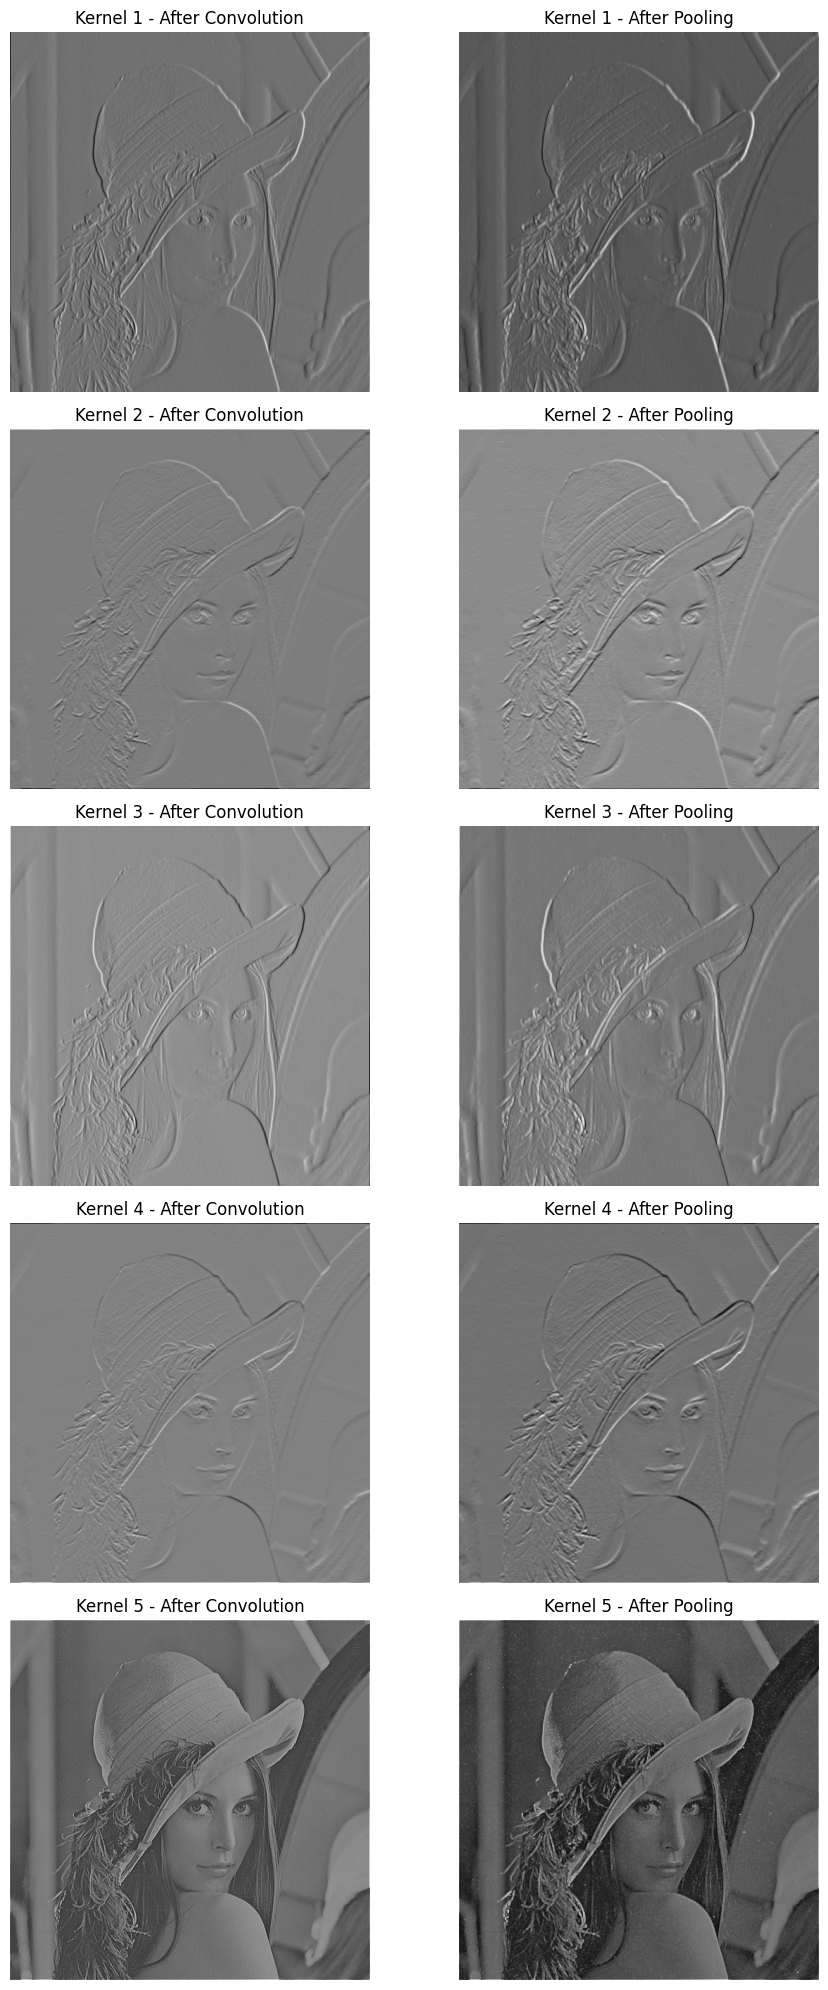

In [11]:
# Display convolution and pooling results
fig_obj, axs = plt.subplots(5, 2, figsize=(10, 20))
filter_names = ["Kernel 1", "Kernel 2", "Kernel 3", "Kernel 4", "Kernel 5"]
for idx in range(5):
    conv_img, pool_img = results[idx]
    
    axs[idx, 0].imshow(conv_img, cmap='gray')
    axs[idx, 0].set_title(f"{filter_names[idx]} - After Convolution")
    axs[idx, 0].axis('off')

    axs[idx, 1].imshow(pool_img, cmap='gray')
    axs[idx, 1].set_title(f"{filter_names[idx]} - After Pooling")
    axs[idx, 1].axis('off')

plt.tight_layout()
plt.show()

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to **build the structure of your model appropriately using keras**. I have provided only the code to download the cifar10 dataset. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

**Final expected outcome:** For the best CNN model architecture and parameters you find, **your model is required to be able to provide accurate predictions**. The **accuracy rate will determine your score**. Make sure you **normalize the input training/testing images to $[0, 1]$** before training. For this **implement a predict function** - instructions given below.

Hint: To improve your model you may use the following techniques. 
1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [13]:
#TODO

#Include necessary code in this cell to train and test
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Optional setup: Force CPU usage and control threading behavior

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.config.threading.set_intra_op_parallelism_threads(0)
tf.config.threading.set_inter_op_parallelism_threads(0)

# Reproducibility: Fix random seeds

import random
random.seed(32)    #32 , 64
np.random.seed(32)
tf.random.set_seed(32)

# Class labels for CIFAR-10 dataset
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Dataset preparation
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = y_train.flatten()
y_test = y_test.flatten()

# define a lightweight CNN model for faster training

def create_fast_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(16, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        
        layers.Conv2D(32, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        
        layers.Conv2D(64, 3, activation='relu', padding='same'),
        layers.MaxPooling2D(2, 2),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model
    
model = create_fast_model()
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=0)

In [14]:
#In this cell define the function predict, which will predict the class of test_images using your best CNN-model.
#The output should be a python list of strings of classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
#Your work will be mainly evaluated based on this.
#The grader will test it against input images and your score will be determined based on the number of correct predictions. 
#Expect the input to be a torch tensor of shape [64, 3, 32, 32] with normalized values [0, 1]

def predict(test_images, batch_size=256):
    # test_images: shape (N, 3, 32, 32)
    np_images = test_images.numpy()  # shape: (N, 3, 32, 32)
    np_images = np.transpose(np_images, (0, 2, 3, 1))  # shape: (N, 32, 32, 3)
    
    # Normalizing(if want)
    if np_images.max() > 1.0:
        np_images = np_images.astype("float32") / 255.0
    
    # Predicting via Keras model
    preds = model.predict(np_images, batch_size=batch_size, verbose=0)
    pred_labels = np.argmax(preds, axis=1)
    predictions = [class_names[i] for i in pred_labels]
    
    return predictions

In [15]:
# Evaluating
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"TEST ACCURACY: {test_accuracy:.4f}")

TEST ACCURACY: 0.6969


In [16]:
end_time = time.time()
print("...........Total execution time taken............\n:", end_time - start_time, "seconds")

...........Total execution time taken............
: 154.81813311576843 seconds
